# Homework2

Please upload to Moodle a .zip archive containing your Jupyter Notebook with solutions and all data required to reproduce your solutions. 

Please also prepare a requirements.txt file which lists all the packages that you have used for your homework, one package per line (e.g., pandas). This will allow us to install all required packages in one go, by using "pip install -r requirements.txt".

Please name your .zip archive using your full name and student id as follows - *Firstnme_Lastname_12345678_COMP47350_Homework2.zip*. 

For your Notebook, please split the code and explanations into many little cells so it is easy to see and read the results of each step of your solution. Please remember to name your variables and methods with self-explanatory names. Please remember to write comments and where needed, justifications, for the decisions you make and code you write. Feel free to revisit *tips_to_keep_your_ipython_notebook_readable_and_easy_to_debug.html* provided on Moodle.

Your code and analysis is like a story that awaits to be read, make it a nice story please!

The accepted file formats for the homework are:
    - .ipynb
    - .zip
    - .pdf
    - .csv
    - .txt
    - .html
Please keep the whole code in a single notebook. Usage of external tools/files is discouraged for portability reasons. Files in any other format but mentioned above can be used but will be ignored and not considered for the submission (including .doc, .rar, .7z, .pages, .xlsx, .tex etc.). 
Any image format is allowed to be used as far as the images appear embedded in your report (.ipynb or .pdf or .html).

**Deadline: Sunday, April 16, 2017, midnight.** 

## Exercises

This homework focuses on building and evaluating prediction models for a particular problem and dataset.
The problem and data come from the Amazon online shopping platform. Several sellers can sell the same product on Amazon. Based on the data provided by the seller to Amazon (seller reputation, product price, shipping details, etc) Amazon ranks seller offers from best to worst for a given product. This ranking is mostly influenced by the product price offer of the seller, but it can also be influenced by other features. We first need to understand which features are most indicative of a seller being ranked first by Amazon for a product. When the seller is ranked first for a product we say that the seller is the 'winner' among all the offers, because their offer is shown first when a user searches for a product on Amazon, which increases their chances of selling the product. Our goal is to work with the data to build and evaluate prediction models that capture the relationship between descriptive features and the target feature 'IsWinner'.

We use the same dataset from Homework1 (you can use your cleaned/prepared CSV or the raw dataset), a CSV file describing offers by given sellers for given products and a column which records whether an offer was a winner or not.

(1). [25] Data Understanding: Exploring relationships between feature pairs:
    - (1.1) [5] Print the correlations between the continuous features.
    - (1.2) [5] Plot the scatter plots of each pair of continuous descriptive feature and target feature.
    - (1.3) [5] Discuss what you observe from the scatter plots and correlations, e.g., which continuous features seem to be better at predicting the target feature. Choose a subset of continuous features you find promising. Justify your choices.
    - (1.4) [5] For each categorical feature, plot the pairwise interaction with the target feature (barplots or stacked barplots).
    - (1.5) [5] Discuss what knowledge you gain from plotting the interaction of descriptive categorical features and the target feature, e.g., which categorical features seem to be better at predicting the target feature. Choose a subset of categorical features you find promising. Justify your choices.
    
(2). [15] Predictive Modeling: Linear Regression  
    - (2.1) [5] Train a linear regression model to predict the target feature IsWinner, using the descriptive features selected in exercise (1). Evaluate the quality of the model on the training set.   
    - (2.2) [2.5] Print the coefficients learned by the model and discuss their statistical significance as well as their role in the model (e.g., interpret the model).    
    - (2.3) [2.5] Retrain the model using only the subset of features found to be statistically significant. Evaluate the quality of the model on the training set.
    - (2.4) [5] Using the better model (as per evaluation on training set), print the predicted target feature value for all the examples in the training set. Threshold the predicted target feature value at 0.5 to get the predicted class for each example. 

(3). [15] Predictive Modeling: Logistic Regression  
    - (3.1) [5] Train a logistic regression model to predict the target feature IsWinner, using the descriptive features selected in exercise (1). Evaluate the quality of the model on the training set.   
    - (3.2) [5] Print the coefficients learned by the model and discuss their statistical significance as well as their role in the model (e.g., interpret the model).    
    - (3.3) [2.5] Retrain the model using only the subset of features found to be statistically significant. Evaluate the quality of the model on the training set.
    - (3.4) [2.5] Using the better model (as per evaluation on training set), print the predicted target feature value for all the examples in the training set. Print the predicted class for each example.
    
(4). [20] Predictive Modeling: Random Forest 
    - (4.1) [5] Train a random forest model to predict the target feature IsWinner, using the descriptive features selected in exercise (1). Evaluate the quality of the model on the training set.   
    - (4.2) [5] Print the features ranked by random forest importance. Discuss your findings and choose a subset of features you find promising.
    - (4.3) [5] Retrain the model using only the subset of features found to be promising. Evaluate the quality of the model on the training set.
    - (4.4) [5] Using the better model (as per evaluation on training set), print the predicted target feature value for all the examples in the training set. Print the predicted class for each example.
    
(5). [25] Evaluating Predictive Models
    - (5.1) [10] Split the dataset into 70% training and remaining 30% test. Train all models from the previous exercises using the new training set and evaluate their quality on the new test set. Print classification evaluation metrics for all models on the test set (e.g., Accuracy, Confusion matrix, Precision, Recall, F1). Discuss how does evaluation on the test set compare to evaluation using the full data for training and also for testing.
    - (5.2) [15] Summarize and try to improve your results so far:
        - (5.2.1) [5] Which model performs best and is it more accurate than a simple (but useless) model that always predicts IsWinner=0? Justify your answers.
        - (5.2.2) [10] Discuss your understanding of the problem and predictive modeling results so far. Can you find any tricks to improve the best model so far (e.g., using feature significance, feature re-scaling, creating new features, combining models, or other knowledge)?

In [108]:
#importing required libraries and csv file

import pandas as pd
df = pd.read_csv('amazon-offers-10k-samples-raw.csv')

# Import package matplotlib for visualisation/plotting
import matplotlib.pyplot as plt

#For showing plots directly in the notebook
%matplotlib inline

import numpy as np

import seaborn as sns

import matplotlib.patches as mpatches

#Import statsmodels package for training a linear regression model.
import statsmodels.formula.api as sm

from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics


In [109]:
#setting up data prior to statistical analysis

#as per assignment 1 feedback: MarketplaceId and SellerID are numerical features but not continual and will need to be removed
#also reformatting the data being sure to remove duplicate rows/columns

#drops duplicate rows
df.drop_duplicates(subset=None, inplace=True) 

#removes constant columns
df = df.loc[:,df.apply(pd.Series.nunique) != 1]

#altering feature types to categorical as boolean values representing data
df['IsWinner'] = df['IsWinner'].astype('category') 
df['IsFeaturedMerchant'] = df['IsFeaturedMerchant'].astype('category')
df['IsFulfilledByAmazon'] = df['IsFulfilledByAmazon'].astype('category')

#altering product and seller ids to type object so as to not interfere with continuous data listed as numeric_columns below
df['ProductId'] = df['ProductId'].astype('object')
df['SellerId'] = df['SellerId'].astype('object')

#display numeric column statistics only
continuous_columns = df.select_dtypes(['int64', 'float64']).columns
df[continuous_columns].describe().T

#descriptive statistics for categorical features only
category_columns = df.select_dtypes(['category']).columns
#df[category_columns].describe().T

#checking feature types
#note: following are lsited as objects: TimeOfOfferChange, ConditionNotes, ShipsFromCountry,ShipsFromState - may wish to change later
df.dtypes


IsWinner                 category
ProductId                  object
TimeOfOfferChange          object
ConditionNotes             object
IsFeaturedMerchant       category
IsFulfilledByAmazon      category
ListingPrice              float64
SellerFeedbackRating        int64
SellerFeedbackCount         int64
SellerId                   object
ShippingPrice             float64
ShippingTime_minHours       int64
ShippingTime_maxHours       int64
ShipsFromCountry           object
ShipsFromState             object
dtype: object

# 1.1 Correlation Matrix - Continuous Features

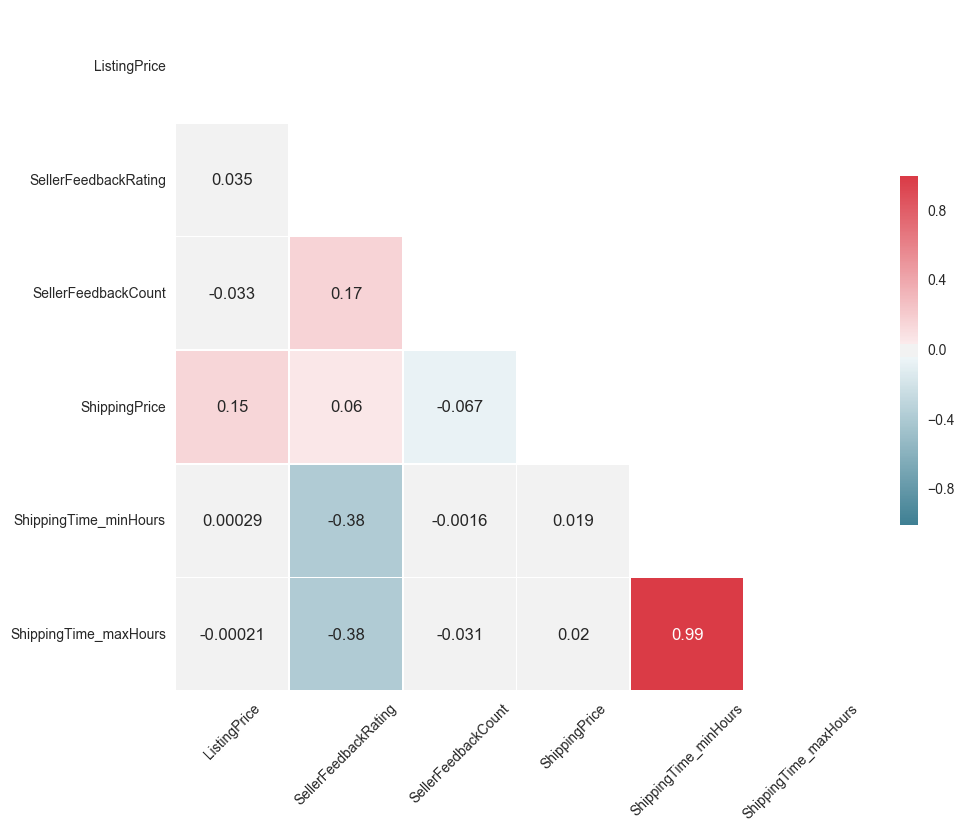

In [110]:
#1.1 Print the correlations between the continuous features.

# Calculate correlation of all pairs of continuous features
corr = df[continuous_columns].corr()

# Setup sns
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom colormap - blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)


#altering feature types back to integer values representing data for future analysis
df['IsWinner'] = df['IsWinner'].astype('int64') 
df['IsFeaturedMerchant'] = df['IsFeaturedMerchant'].astype('int64')
df['IsFulfilledByAmazon'] = df['IsFulfilledByAmazon'].astype('int64')

#  1.2 Scatter plots of each pair of continuous descriptive feature and target feature

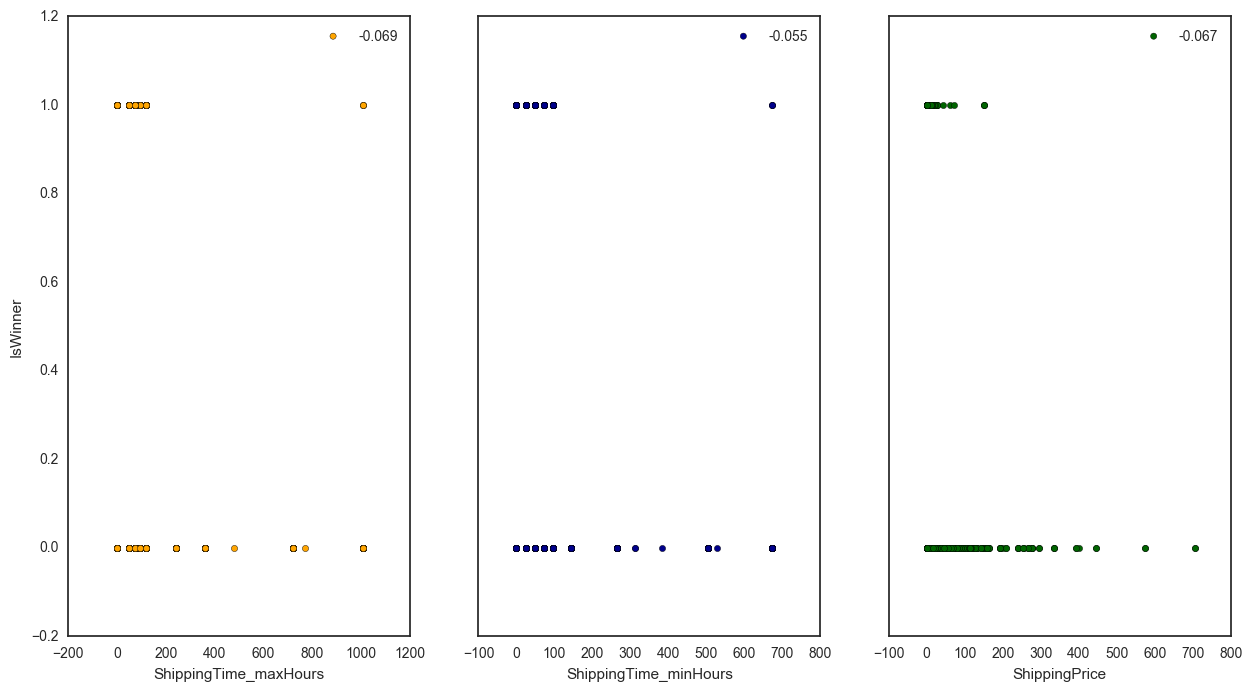

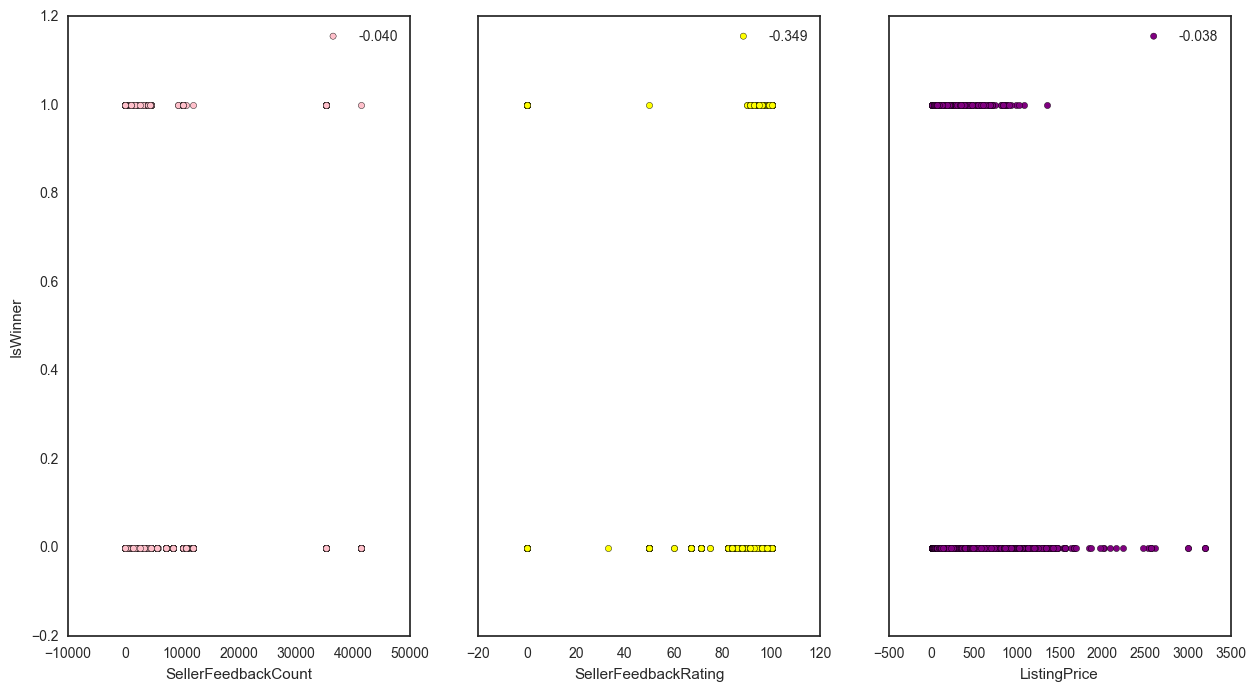

In [111]:
#scatter plots of each pair of continuous descriptive feature and target feature IsWinner

#as requested using the target feature isWinner - changing it back to integer to allow plotting
df['IsWinner'] = df['IsWinner'].astype('int64') 


#plotting in groups of three for layout purposes
fig, axs = plt.subplots(1, 3, sharey=True)
df.plot(kind='scatter', x='ShippingTime_maxHours', y='IsWinner', c='orange', label="%.3f" % df[['ShippingTime_maxHours', 'IsWinner']].corr().as_matrix()[0,1], ax=axs[0], figsize=(15, 8))
df.plot(kind='scatter', x='ShippingTime_minHours', y='IsWinner', c='darkblue',label="%.3f" % df[['ShippingTime_minHours', 'IsWinner']].corr().as_matrix()[0,1], ax=axs[1], figsize=(15, 8))
df.plot(kind='scatter', x='ShippingPrice', y='IsWinner', c='darkgreen',label="%.3f" % df[['ShippingPrice', 'IsWinner']].corr().as_matrix()[0,1], ax=axs[2], figsize=(15, 8))

fig, axs = plt.subplots(1, 3, sharey=True)
df.plot(kind='scatter', x='SellerFeedbackCount', y='IsWinner', c='pink',label="%.3f" % df[['SellerFeedbackCount', 'IsWinner']].corr().as_matrix()[0,1], ax=axs[0], figsize=(15, 8))
df.plot(kind='scatter', x='SellerFeedbackRating', y='IsWinner', c='yellow',label="%.3f" % df[['SellerFeedbackRating', 'IsWinner']].corr().as_matrix()[0,1], ax=axs[1], figsize=(15, 8))
df.plot(kind='scatter', x='ListingPrice', y='IsWinner', c='purple',label="%.3f" % df[['ListingPrice', 'IsWinner']].corr().as_matrix()[0,1], ax=axs[2], figsize=(15, 8))

#changing target feature back to categorical type
df['IsWinner'] = df['IsWinner'].astype('category')


#initially drafted other scatter plots comparing all the correlations against each other:

#df.plot(kind='scatter', x='ShippingTime_maxHours', y='ListingPrice')
#df.plot(kind='scatter', x='ShippingTime_minHours', y='ListingPrice')
#df.plot(kind='scatter', x='ShippingPrice', y='ListingPrice')
#df.plot(kind='scatter', x='SellerFeedbackCount', y='ListingPrice')
#df.plot(kind='scatter', x='SellerFeedbackRating', y='ListingPrice')

#df.plot(kind='scatter', x='ShippingTime_maxHours', y='SellerFeedbackRating')
#df.plot(kind='scatter', x='ShippingTime_minHours', y='SellerFeedbackRating')
#df.plot(kind='scatter', x='ShippingPrice', y='SellerFeedbackRating')
#df.plot(kind='scatter', x='SellerFeedbackCount', y='SellerFeedbackRating')

#df.plot(kind='scatter', x='ShippingTime_maxHours', y='SellerFeedbackCount')
#df.plot(kind='scatter', x='ShippingTime_minHours', y='SellerFeedbackCount')
#df.plot(kind='scatter', x='ShippingPrice', y='SellerFeedbackCount')

#df.plot(kind='scatter', x='ShippingTime_maxHours', y='ShippingPrice')
#df.plot(kind='scatter', x='ShippingTime_minHours', y='ShippingPrice')

#df.plot(kind='scatter', x='ShippingTime_maxHours', y='ShippingTime_minHours')


# 1.3 Discuss what you observe from the scatter plots and correlations

# 1.4 For each categorical feature, plot the pairwise interaction with the target feature (barplots or stacked barplots)

(0, 100)

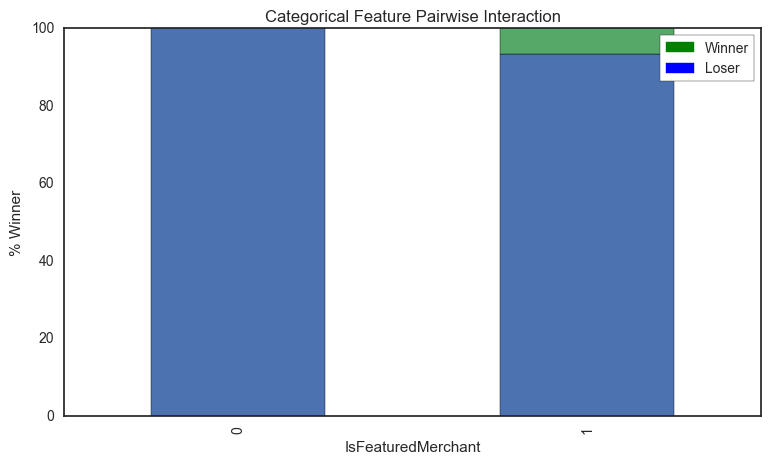

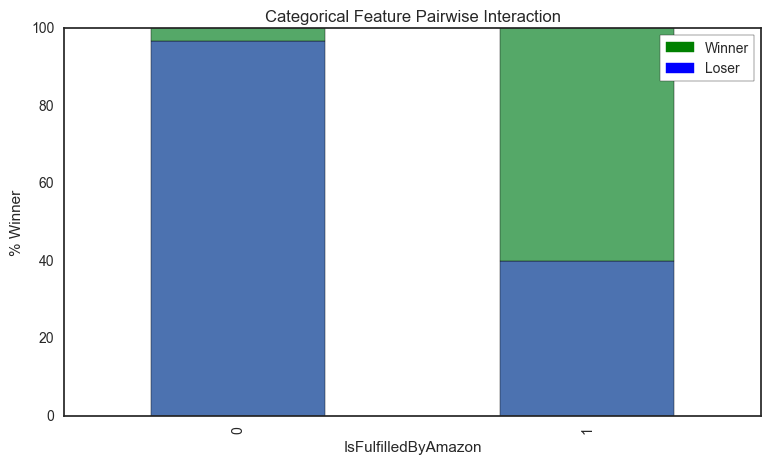

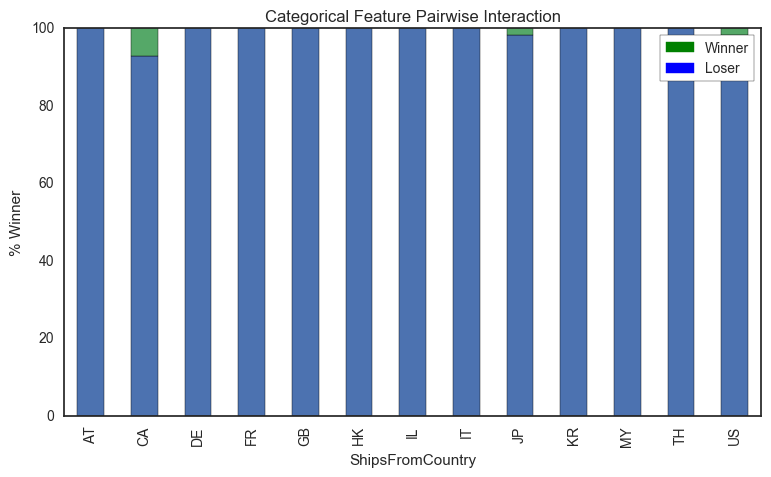

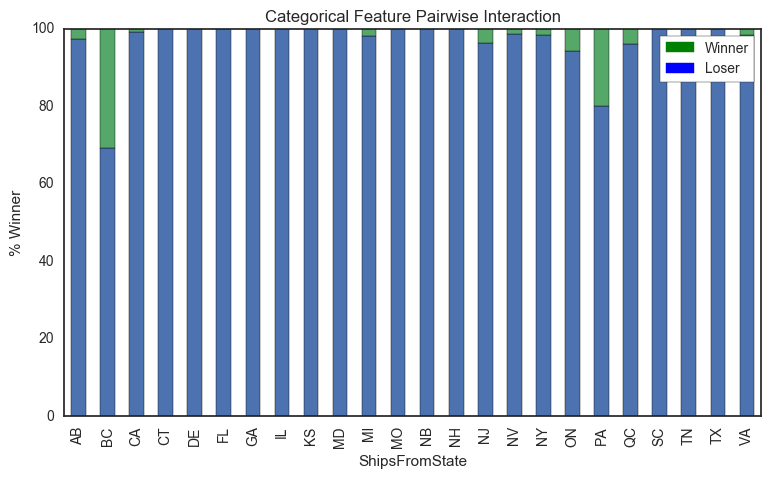

In [112]:
# Find unique values in IsFeaturedMerchant
featured = pd.unique(df.IsFeaturedMerchant.ravel())

# Insert a new column called 'percent' and fill it with 0s
df['percent'] = 0

# Iterate through the unique values in Party and for each value count the amount of elected candidates
# Find the indexes of each row with a particular party amd for each of these row insert count * 100 in the percent column
for f in featured:
    count = 1 / df[df.IsFeaturedMerchant == f].count()['IsWinner']
    index_list = df[df['IsFeaturedMerchant'] == f].index.tolist()
    for i in index_list:
        df.loc[i, 'percent'] = count * 100
        
# Group dataframe by Party and Elected and sum percent
group = df[['percent','IsFeaturedMerchant','IsWinner']].groupby(['IsFeaturedMerchant','IsWinner']).sum()

# Plot values of group in a stacked bar chart
my_plot = group.unstack().plot(kind='bar', stacked=True, title="Categorical Feature Pairwise Interaction", figsize=(9,5))

# Define label colours and text and add to the plot
green_patch = mpatches.Patch(color='green', label='Winner')
blue_patch = mpatches.Patch(color='blue', label='Loser')
my_plot.legend(handles=[green_patch, blue_patch], frameon = True)

# Define x and y labels and min and max values for the y axis
my_plot.set_xlabel("IsFeaturedMerchant")
my_plot.set_ylabel("% Winner")
my_plot.set_ylim([0,100])

#IsFulfilledByAmazon

# Find unique values in IsFulfilledByAmazon
featured = pd.unique(df.IsFulfilledByAmazon.ravel())

# Insert a new column called 'percent' and fill it with 0s
df['percent'] = 0

# Iterate through the unique values in Party and for each value count the amount of elected candidates
# Find the indexes of each row with a particular party amd for each of these row insert count * 100 in the percent column
for f in featured:
    count = 1 / df[df.IsFulfilledByAmazon == f].count()['IsWinner']
    index_list = df[df['IsFulfilledByAmazon'] == f].index.tolist()
    for i in index_list:
        df.loc[i, 'percent'] = count * 100
        
# Group dataframe by Party and Elected and sum percent
group = df[['percent','IsFulfilledByAmazon','IsWinner']].groupby(['IsFulfilledByAmazon','IsWinner']).sum()

# Plot values of group in a stacked bar chart
my_plot = group.unstack().plot(kind='bar', stacked=True, title="Categorical Feature Pairwise Interaction", figsize=(9,5))

# Define label colours and text and add to the plot
green_patch = mpatches.Patch(color='green', label='Winner')
blue_patch = mpatches.Patch(color='blue', label='Loser')
my_plot.legend(handles=[green_patch, blue_patch], frameon = True)

# Define x and y labels and min and max values for the y axis
my_plot.set_xlabel("IsFulfilledByAmazon")
my_plot.set_ylabel("% Winner")
my_plot.set_ylim([0,100])


#ShipsFromCountry

# Find unique values in ShipsFromCountry
featured = pd.unique(df.ShipsFromCountry.ravel())

# Insert a new column called 'percent' and fill it with 0s
df['percent'] = 0

# Iterate through the unique values in Party and for each value count the amount of elected candidates
# Find the indexes of each row with a particular party amd for each of these row insert count * 100 in the percent column
for f in featured:
    count = 1 / df[df.ShipsFromCountry == f].count()['IsWinner']
    index_list = df[df['ShipsFromCountry'] == f].index.tolist()
    for i in index_list:
        df.loc[i, 'percent'] = count * 100
        
# Group dataframe by Party and Elected and sum percent
group = df[['percent','ShipsFromCountry','IsWinner']].groupby(['ShipsFromCountry','IsWinner']).sum()

# Plot values of group in a stacked bar chart
my_plot = group.unstack().plot(kind='bar', stacked=True, title="Categorical Feature Pairwise Interaction", figsize=(9,5))

# Define label colours and text and add to the plot
green_patch = mpatches.Patch(color='green', label='Winner')
blue_patch = mpatches.Patch(color='blue', label='Loser')
my_plot.legend(handles=[green_patch, blue_patch], frameon = True)

# Define x and y labels and min and max values for the y axis
my_plot.set_xlabel("ShipsFromCountry")
my_plot.set_ylabel("% Winner")
my_plot.set_ylim([0,100])


#ShipsFromState 

# Find unique values in ShipsFromState
featured = pd.unique(df.ShipsFromState.ravel())

# Insert a new column called 'percent' and fill it with 0s
df['percent'] = 0

# Iterate through the unique values in Party and for each value count the amount of elected candidates
# Find the indexes of each row with a particular party amd for each of these row insert count * 100 in the percent column
for f in featured:
    count = 1 / df[df.ShipsFromState == f].count()['IsWinner']
    index_list = df[df['ShipsFromState'] == f].index.tolist()
    for i in index_list:
        df.loc[i, 'percent'] = count * 100
        
# Group dataframe by Party and Elected and sum percent
group = df[['percent','ShipsFromState','IsWinner']].groupby(['ShipsFromState','IsWinner']).sum()

# Plot values of group in a stacked bar chart
my_plot = group.unstack().plot(kind='bar', stacked=True, title="Categorical Feature Pairwise Interaction",figsize=(9,5))

# Define label colours and text and add to the plot
green_patch = mpatches.Patch(color='green', label='Winner')
blue_patch = mpatches.Patch(color='blue', label='Loser')
my_plot.legend(handles=[green_patch, blue_patch], frameon = True)

# Define x and y labels and min and max values for the y axis
my_plot.set_xlabel("ShipsFromState")
my_plot.set_ylabel("% Winner")
my_plot.set_ylim([0,100])

# 1.5 Discuss what knowledge you gain from plotting the interaction of descriptive categorical features and the target feature

From reviewing the barcharts above:

1. IsFeaturedMerchant: Approximately 0-10% of featured merchant products feature as winning products i.e. ranking top in amazon searches. This is the key data obtained from the barplot pictured above.

2. IsFulfilledByAmazon: Approximately 0-60% of amazon fulfilled products feature as winning products i.e. ranking top in amazon searches. This is the key data obtained from the barplot pictured above.

3. ShipsFromCountry: The following countries have produts that feature as winners in search results: CA, JP, US. The following countires have no winning product results from the dataset: AT, DE, FR, GB, HK, IL, IT, KR, MY, TH.

4. ShipsFromState: The following states have products that feature as winners in search results: AB, BC, CA, MI, NJ, NV, NY, ON, PA, QC, VA. The following states have no winning products in search results: CT, DE, FL, GA, IL, KS, MD, MO, NB, NH, SC, TN, TX


Overall:

To try and secure a winning category it would seem more favourable to have your product fulfilled by amazon diectly with shipping based in CA. Alternatively if you were shipping from the US the CA state would be most favourable to use.

Promising Features:

From the above plots the most useful features would be the IsFeaturedMerchant and IsFulfilledByAmazon. The individual state shipping may be useful for a more localised analysis based on the US however due to the nature of the dataset we cannot limit our analysis to that narrow a perspective. The ships from country information may be considered for further analysis however as it is limited to three countries there will be limited data we can obtain from analysing that data further.


# 2.1Train a linear regression model to predict the target feature IsWinner, using the descriptive features selected in exercise (1). Evaluate the quality of the model on the training set. 

In [113]:
# 2.1Train a linear regression model to predict the target feature IsWinner, 
# using the descriptive features selected in exercise (1).

# The formula specifies the target feature and the descriptive features used for training the 
# linear regression model.
# We first train a simple linear regression with only one descriptive feature each.
# For training the model we call the method fit() on the given data stored in our df dataframe.

#we need to make IsWinner integer value for the purposes of this model
df['IsWinner'] = df['IsWinner'].astype('int64') 

#multiple linear regression - using fit method for training
lm = sm.ols(formula="IsWinner ~  ShippingTime_maxHours + ShippingTime_minHours + SellerFeedbackCount + SellerFeedbackRating + ListingPrice + ShippingPrice", data=df).fit()

#Evaluating the quality of the model on the training set
print(lm.summary())
print()

                            OLS Regression Results                            
Dep. Variable:               IsWinner   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     374.4
Date:                Mon, 17 Apr 2017   Prob (F-statistic):               0.00
Time:                        18:01:57   Log-Likelihood:                 1573.7
No. Observations:                9886   AIC:                            -3133.
Df Residuals:                    9879   BIC:                            -3083.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Intercept                 0.52

## Quality of the model on the training set:

At an initial look at the model the following features are noted:

- When reviewing the model developed it is notable that a large volume of the returned data falls above and below 0.

- Some of the values displayed in the model (SellerFeedbackCount and ListingPrice) feature very small numbers ranging at e-05 down to e-07 values - the small nature of these figures at a glance may make them near irrelevant for the purposes of our analysis

- For P value to be reelvant the values should fall below 0.5. As SellerFeedbackCount exceeds this quota it will be advisable to drop it.

- The overall R-squared value of 0.185 is poor - the ideal number expected would be 1 for a perfect model however when comparing it against linear regression models based only a single continuous feature this R-squared value and overall model is more valuable.

# 2.2 Print the coefficients learned by the model and discuss their statistical significance as well as their role in the model (e.g., interpret the model).    

In [114]:
# Print the model weights/parameters

#multiple line regression
#The model learnedis: IsWinner = 5.251340e-01 + (-2.305188e-03 * ShippingTime_maxHours) + (2.723524e-03 * ShippingTime_minHours)
# + (-2.821633e-04 * ShippingPrice) + (-1.063002e-07 * SellerFeedbackCount) + (-4.641910e-03 * SellerFeedbackRating)
# + (-1.679219e-05 * ListingPrice)

print(lm.params)
print()

Intercept                5.251340e-01
ShippingTime_maxHours   -2.305188e-03
ShippingTime_minHours    2.723524e-03
SellerFeedbackCount     -1.063002e-07
SellerFeedbackRating    -4.641910e-03
ListingPrice            -1.679219e-05
ShippingPrice           -2.821633e-04
dtype: float64



## 2.2 Continued: Interpreting the Model

When reviewing the data the following conclusions were drawn:

- The initial coefficient values varied dramatically ranging from e-01 to e-07. Due to the small nature of the numbers it's evident that the SellerFeedbackCount value is so close to 0 it is most likely the least valuable statistic worth including in our model. ListingPrice and ShippingPrice ranking as low of e-05 and e-04 are also highly varied and do not appear to be beneficial to the model. 

- When reviewing the coefficients its evident that all values hold a negative impact towards the linear regression apart from ShippingTime_minHours which appears to have a positive influence on products listed as winning features.


### Sample model output using df:

In [115]:
# Creates new dataframes with new test examples

#review for stats of the header of df to ensure its correct...
df.head()

,IsWinner,ProductId,TimeOfOfferChange,ConditionNotes,IsFeaturedMerchant,IsFulfilledByAmazon,ListingPrice,SellerFeedbackRating,SellerFeedbackCount,SellerId,ShippingPrice,ShippingTime_minHours,ShippingTime_maxHours,ShipsFromCountry,ShipsFromState,percent
0,0,-4885255916155087854,2016-02-04T04:26:52.136Z,NaN,1,1,94.00,0,0,1207135739277432339,0.00,672,1008,NaN,NaN,0.000000
1,1,-4885255916155087854,2016-02-04T04:26:52.136Z,Ready To Ship - We are unable to ship to PO Bo...,1,0,107.35,95,4078,-1789487307643024748,0.00,48,72,CA,ON,0.045228
2,0,-4885255916155087854,2016-02-04T04:26:52.136Z,.,1,0,100.46,98,478,5452082314297826053,6.99,24,48,CA,ON,0.045228
3,0,-4885255916155087854,2016-02-04T04:26:52.136Z,Fast shipping in Canada.,1,0,99.24,95,4384,-2572277640783537773,11.67,24,48,CA,ON,0.045228
4,0,-4885255916155087854,2016-02-04T04:26:52.136Z,NaN,0,0,109.48,94,105,-8704029307873847986,8.99,24,48,CA,ON,0.045228


In [116]:
#predict the iswinner for the overall data set with our model
lm.predict(df)

array([ 0.03013383,  0.04667196,  0.02123223, ...,  0.02627163,
        0.47376826,  0.02253424])

# 2.3 Retrain the model using only the subset of features found to be statistically significant. Evaluate the quality of the model on the training set.

In [117]:
#we need to make IsWinner integer value for the purposes of this model
df['IsWinner'] = df['IsWinner'].astype('int64') 

#for our new model we are going to remove SellerFeedbackCount

#multiple linear regression - using fit method for training- removed: SellerFeedbackCount & ListingPrice due to high P-Values 
lmnew = sm.ols(formula="IsWinner ~  ShippingTime_maxHours + ShippingTime_minHours + SellerFeedbackRating + ShippingPrice", data=df).fit()

#Evaluating the quality of the new model on the training set
print(lmnew.summary())
print()

                            OLS Regression Results                            
Dep. Variable:               IsWinner   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     560.4
Date:                Mon, 17 Apr 2017   Prob (F-statistic):               0.00
Time:                        18:01:57   Log-Likelihood:                 1571.5
No. Observations:                9886   AIC:                            -3133.
Df Residuals:                    9881   BIC:                            -3097.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Intercept                 0.52

In [118]:
print(lmnew.params)

Intercept                0.522374
ShippingTime_maxHours   -0.002287
ShippingTime_minHours    0.002696
SellerFeedbackRating    -0.004657
ShippingPrice           -0.000303
dtype: float64


# 2.4 Using the better model (as per evaluation on training set), print the predicted target feature value for all the examples in the training set. Threshold the predicted target feature value at 0.5 to get the predicted class for each example. 

In [119]:
#Threshold predictions - as per quesiton it prints predicted target feature values of all examples in training set.
#Any value below 0.5 prints 0; above 0.5 prints 1; No requirement in question for exact value of 0.5 to be handled.

predictions = lmnew.predict(df)

#prediction values
#for elem in predictions:
    #if(elem<0.5):
        #print("0")
    #else:
        #print("1")

threshold = list()

for value in predictions:
    if value < 0.5:
        threshold.append(0)
    elif value > 0.5:
        threshold.append(1)
        
df_true_vs_lm_predicted = pd.DataFrame({'ActualClass': df.IsWinner, 'ThresholdPredictedClass': threshold, 'PredictedClass': predictions})
df_true_vs_lm_predicted

,ActualClass,PredictedClass,ThresholdPredictedClass
0,0,0.028719,0
1,1,0.044651,0
2,0,0.018749,0
3,0,0.031304,0
4,0,0.036773,0
5,0,0.163135,0
6,0,0.011551,0
7,0,0.056595,0
8,0,0.051954,0
9,0,0.056595,0


# 3.1 Train a logistic regression model to predict the target feature IsWinner, using the descriptive features selected in exercise (1). Evaluate the quality of the model on the training set.   

In [120]:
# Train a logistic regression model to predict the target feature IsWinner, 
# using the descriptive features selected in exercise (1).
# Evaluate the quality of the model on the training set.   

#we need to make IsWinner a categorical feature
df['IsWinner'] = df['IsWinner'].astype('int64') 

#multiple linear regression version
logreg = sm.logit(formula="IsWinner ~  ShippingTime_maxHours + ShippingTime_minHours + ShippingPrice + SellerFeedbackCount + SellerFeedbackRating + ListingPrice", data=df).fit()

#Evaluating the quality of the model on the training set
#Dote: only works while IsWinner is integer value

print(logreg.summary())
print()



Optimization terminated successfully.
         Current function value: 0.159395
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               IsWinner   No. Observations:                 9886
Model:                          Logit   Df Residuals:                     9879
Method:                           MLE   Df Model:                            6
Date:                Mon, 17 Apr 2017   Pseudo R-squ.:                  0.2549
Time:                        18:01:58   Log-Likelihood:                -1575.8
converged:                       True   LL-Null:                       -2114.8
                                        LLR p-value:                1.136e-229
                            coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Intercept                 1.3490      0.161      8.360      0.000         1.033     1.

## 3.1 Continued: Quality of the model on the training set.

At an initial look at the model the following features are noted:

- When reviewing the model developed it is notable that SellerFeedbackCount and ListingPrice both feature P values above 0.2. As the ideal P value should be 0 these may be considered worthwhile to drop in order to improve our model.

- The models Pseudo R-Squared value of 0.2549 does not suggest this is a highly efficient model.

# 3.2 Print the coefficients learned by the model and discuss their statistical significance as well as their role in the model (e.g., interpret the model).  

In [121]:
# Print the model weights/parameters

#multiple line regression
print(logreg.params)
print()

Intercept                1.349038
ShippingTime_maxHours   -0.125961
ShippingTime_minHours    0.140427
ShippingPrice           -0.021705
SellerFeedbackCount     -0.000006
SellerFeedbackRating    -0.021163
ListingPrice            -0.000278
dtype: float64



## 3.2 Continued: Interpreting the Model

When reviewing the data the following conclusions were drawn:

- ShippingTime_minHours is the only coefficient value that has a positive correaltion with the IsWinner target feature.

# 3.3 Retrain the model using only the subset of features found to be statistically significant. Evaluate the quality of the model on the training set.

In [122]:
#we need to make IsWinner integer value for the purposes of this model
df['IsWinner'] = df['IsWinner'].astype('int64') 

#for our new model we are going to remove SellerFeedbackCount and ListingPrice

#multiple linear regression - using fit method for training - note: SellerFeedbackCount and ListingPrice removed from this model due to high P-values
logregnew = sm.logit(formula="IsWinner ~  ShippingTime_maxHours + ShippingTime_minHours + ShippingPrice + SellerFeedbackRating", data=df).fit()

#Evaluating the quality of the new model on the training set
print(logregnew.summary())
print()

Optimization terminated successfully.
         Current function value: 0.159545
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               IsWinner   No. Observations:                 9886
Model:                          Logit   Df Residuals:                     9881
Method:                           MLE   Df Model:                            4
Date:                Mon, 17 Apr 2017   Pseudo R-squ.:                  0.2542
Time:                        18:01:58   Log-Likelihood:                -1577.3
converged:                       True   LL-Null:                       -2114.8
                                        LLR p-value:                1.858e-231
                            coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Intercept                 1.3127      0.158      8.285      0.000         1.002     1.

# 3.4 Using the better model (as per evaluation on training set), print the predicted target feature value for all the examples in the training set. Print the predicted class for each example.

In [123]:
#logistic regression without using sci-kit... may need to swap to sci-kit version

predictions = logregnew.predict(df)
    
threshold2 = list()

for value in predictions:
    if value < 0.5:
        threshold2.append(0)
    elif value > 0.5:
        threshold2.append(1)
        
df_true_vs_log_predicted = pd.DataFrame({'ActualClass': df.IsWinner, 'PredictedClass': predictions, 'ThresholdPredictedClass': threshold2})
df_true_vs_log_predicted

,ActualClass,PredictedClass,ThresholdPredictedClass
0,0,1.960779e-14,0
1,1,4.308968e-02,0
2,0,2.544473e-02,0
3,0,2.465067e-02,0
4,0,2.658940e-02,0
5,0,4.873206e-02,0
6,0,2.811370e-02,0
7,0,6.520413e-02,0
8,0,3.071615e-02,0
9,0,6.520413e-02,0


# 4.1  Train a random forest model to predict the target feature IsWinner, using the descriptive features selected in exercise (1). Evaluate the quality of the model on the training set. 

In [124]:
#we need to make IsWinner integer value for the purposes of this model
df['IsWinner'] = df['IsWinner'].astype('int64') 

df_continuous_features = df[['ShippingTime_maxHours', 'ShippingTime_minHours', 'SellerFeedbackCount', 'SellerFeedbackRating', 'ListingPrice', 'ShippingPrice']]
df_target_feature = pd.get_dummies(df[['IsWinner']])

rfc = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1)

# Fit model on full dataset
rfc.fit(df_continuous_features,df_target_feature)

C:\Users\danie\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=1, verbose=0, warm_start=False)

In [125]:
# to evaluate quality of model on training set using metrics library to generate accurary score, confusion matrix, and classificaiton report

rfc_predictions = rfc.predict(df_continuous_features)

print("Accuracy: ", metrics.accuracy_score(df_target_feature, rfc_predictions))
print()
print("Confusion matrix: \n", metrics.confusion_matrix(df_target_feature, rfc_predictions))
print()
print("Classification report:\n ", metrics.classification_report(df_target_feature, rfc_predictions))
print()

# compute the out-of-bag classification accuracy
print("Out of bag classification accuracy:", rfc.oob_score_)


Accuracy:  0.99534695529

Confusion matrix: 
 [[9321   18]
 [  28  519]]

Classification report:
               precision    recall  f1-score   support

          0       1.00      1.00      1.00      9339
          1       0.97      0.95      0.96       547

avg / total       1.00      1.00      1.00      9886


Out of bag classification accuracy: 0.972081731742


### Quality of the Model on the Training Set

Overall accuracy rating of 0.9953... is very high and encouraging sign of a good model.
The overall average/total classification precision recall and f1-score results of 1 are perfect scores (despite variation in the results surrounding the 1 value).

The confusion matrix indicates 18 false positives and 28 false negatives. COnsidering the large dataset of approximately 9886 values these numbers make a negligible margin of error in the model.

# 4.2 Print the features ranked by random forest importance. Discuss your findings and choose a subset of features you find promising.

In [126]:
pd.DataFrame({'feature': df_continuous_features.columns, 'importance':rfc.feature_importances_})

,feature,importance
0,ShippingTime_maxHours,0.165597
1,ShippingTime_minHours,0.163991
2,SellerFeedbackCount,0.109467
3,SellerFeedbackRating,0.056124
4,ListingPrice,0.367865
5,ShippingPrice,0.136956


# 4.3 Retrain the model using only the subset of features found to be promising. Evaluate the quality of the model on the training set.

In [127]:
#we need to make IsWinner integer value for the purposes of this model
df['IsWinner'] = df['IsWinner'].astype('int64') 

#note: removing SellerFeedbackRating and SellerFeedbackCount from this set of features
df_continuous_features_modified = df[['ShippingTime_maxHours', 'ShippingTime_minHours', 'ListingPrice', 'ShippingPrice']]
df_target_feature = pd.get_dummies(df[['IsWinner']])

rfc2 = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1)

# Fit model on full dataset
rfc2.fit(df_continuous_features_modified,df_target_feature)

C:\Users\danie\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=1, verbose=0, warm_start=False)

In [128]:
# to evaluate quality of model on training set using metrics library to generate accurary score, confusion matrix, and classificaiton report

rfc_predictions2 = rfc2.predict(df_continuous_features_modified)

print("Accuracy: ", metrics.accuracy_score(df_target_feature, rfc_predictions2))
print()
print("Confusion matrix: \n", metrics.confusion_matrix(df_target_feature, rfc_predictions2))
print()
print("Classification report:\n ", metrics.classification_report(df_target_feature, rfc_predictions2))
print()

# compute the out-of-bag classification accuracy
print("Out of bag classification accuracy:", rfc2.oob_score_)

Accuracy:  0.995043495853

Confusion matrix: 
 [[9318   21]
 [  28  519]]

Classification report:
               precision    recall  f1-score   support

          0       1.00      1.00      1.00      9339
          1       0.96      0.95      0.95       547

avg / total       1.00      1.00      1.00      9886


Out of bag classification accuracy: 0.972182884888


# 4.4 Using the better model (as per evaluation on training set), print the predicted target feature value for all the examples in the training set. Print the predicted class for each example.

In [129]:
threshold3 = list()

for value in predictions:
    if value < 0.5:
        threshold3.append(0)
    elif value > 0.5:
        threshold3.append(1)
        
df_true_vs_rfc_predicted = pd.DataFrame({'ActualClass': df.IsWinner, 'PredictedClass': rfc_predictions2})
df_true_vs_rfc_predicted

,ActualClass,PredictedClass
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


# 5.1 Split the dataset into 70% training and remaining 30% test. Train all models from the previous exercises using the new training set and evaluate their quality on the new test set. Print classification evaluation metrics for all models on the test set (e.g., Accuracy, Confusion matrix, Precision, Recall, F1). Discuss how does evaluation on the test set compare to evaluation using the full data for training and also for testing.

Splitting of dataset:

In [130]:
#Total number or rows approximately 9886. 70% = 7920; 30% = 1966

#initial items being used for out models
#ShippingTime_maxHours + ShippingTime_minHours + SellerFeedbackCount + SellerFeedbackRating + ListingPrice + ShippingPrice", data=df).fit()
trainingSet = pd.DataFrame({'IsWinner':  df.IsWinner[:7920], 'ShippingTime_maxHours': df.ShippingTime_maxHours[:7920], 'ShippingTime_minHours': df.ShippingTime_minHours[:7920], 'SellerFeedbackCount': df.SellerFeedbackCount[:7920], 'SellerFeedbackRating': df.SellerFeedbackRating[:7920], 'ListingPrice': df.ListingPrice[:7920], 'ShippingPrice': df.ShippingPrice[:7920]})                                  

testSet = pd.DataFrame({'IsWinner':  df.IsWinner[7921:9886],'ShippingTime_maxHours': df.ShippingTime_maxHours[7921:9886], 'ShippingTime_minHours': df.ShippingTime_minHours[7921:9886], 'SellerFeedbackCount': df.SellerFeedbackCount[7921:9886], 'SellerFeedbackRating': df.SellerFeedbackRating[7921:9886], 'ListingPrice': df.ListingPrice[7921:9886], 'ShippingPrice': df.ShippingPrice[7921:9886]})

#trainingSet.head()
#testSet.head()

# Linear Model - Training & Testing

In [131]:
#Linear Model - Training Set

#using our improved model with SellerFeedbackCount & ListingPrice due to high P-Values
lmTrainingSet = sm.ols(formula="IsWinner ~  ShippingTime_maxHours + ShippingTime_minHours + SellerFeedbackRating + ShippingPrice", data=trainingSet).fit()

#Evaluating the quality of the new model on the training set
print(lmTrainingSet.summary())
print()

                            OLS Regression Results                            
Dep. Variable:               IsWinner   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     491.3
Date:                Mon, 17 Apr 2017   Prob (F-statistic):               0.00
Time:                        18:02:04   Log-Likelihood:                 1372.2
No. Observations:                7920   AIC:                            -2734.
Df Residuals:                    7915   BIC:                            -2700.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Intercept                 0.53

In [132]:
 #Linear Model - Testing Set

#using our improved model with SellerFeedbackCount & ListingPrice due to high P-Values
lmTestSet = sm.ols(formula="IsWinner ~  ShippingTime_maxHours + ShippingTime_minHours + SellerFeedbackRating + ShippingPrice", data=testSet).fit()

#Evaluating the quality of the new model on the training set
print(lmTestSet.summary())
print()


#altering dataset due to error comparing binary and continuous data - turning float points into 0 or 1 values
#making this change to allow for accuracy, confusion matrix and classification report to be generated

continuousFeatures = list(lmTestSet.predict(testSet))
modified = list()

for value in continuousFeatures:
    if value < 0.5:
        modified.append(0)
    elif value > 0.5:
        modified.append(1)

# attempt at getting accuracy, matrix, classification report for logistic regression

#log_predictionsImproved2 = logimproved2.predict(newContinuous)

print("Accuracy: ", metrics.accuracy_score(testSet.IsWinner, modified))
print()
print("Confusion matrix: \n", metrics.confusion_matrix(testSet.IsWinner, modified))
print()
print("Classification report:\n ", metrics.classification_report(testSet.IsWinner, modified))
print()

                            OLS Regression Results                            
Dep. Variable:               IsWinner   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     78.40
Date:                Mon, 17 Apr 2017   Prob (F-statistic):           9.29e-62
Time:                        18:02:05   Log-Likelihood:                 213.55
No. Observations:                1965   AIC:                            -417.1
Df Residuals:                    1960   BIC:                            -389.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Intercept                 0.46

C:\Users\danie\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Logistics Model - Training & Testing

In [133]:
#Logistics Model - Training Set

#using our improved model with SellerFeedbackCount & ListingPrice removed from the model
logimproved = sm.logit(formula="IsWinner ~  ShippingTime_maxHours + ShippingTime_minHours + ShippingPrice + SellerFeedbackRating", data=trainingSet).fit()

#Evaluating the quality of the new model on the training set
print(logimproved.summary())
print()

Optimization terminated successfully.
         Current function value: 0.156751
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:               IsWinner   No. Observations:                 7920
Model:                          Logit   Df Residuals:                     7915
Method:                           MLE   Df Model:                            4
Date:                Mon, 17 Apr 2017   Pseudo R-squ.:                  0.2608
Time:                        18:02:05   Log-Likelihood:                -1241.5
converged:                       True   LL-Null:                       -1679.4
                                        LLR p-value:                2.784e-188
                            coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Intercept                 1.1479      0.169      6.801      0.000         0.817     1

In [134]:
#Logistic Model - Testing Set

#multiple linear regression version
logimproved2 = sm.logit(formula="IsWinner ~  ShippingTime_maxHours + ShippingTime_minHours + ShippingPrice + SellerFeedbackRating", data=testSet).fit()

#Evaluating the quality of the model on the training set
#Dote: only works while IsWinner is integer value

print(logimproved2.summary())
print()


#altering dataset due to error comparing binary and continuous data - turning float points into 0 or 1 values
#making this change to allow for accuracy, confusion matrix and classification report to be generated

continuousFeatures = list(logimproved2.predict(testSet))
modified = list()

for value in continuousFeatures:
    if value < 0.5:
        modified.append(0)
    elif value > 0.5:
        modified.append(1)

# attempt at getting accuracy, matrix, classification report for logistic regression

#log_predictionsImproved2 = logimproved2.predict(newContinuous)

print("Accuracy: ", metrics.accuracy_score(testSet.IsWinner, modified))
print()
print("Confusion matrix: \n", metrics.confusion_matrix(testSet.IsWinner, modified))
print()
print("Classification report:\n ", metrics.classification_report(testSet.IsWinner, modified))
print()

Optimization terminated successfully.
         Current function value: 0.161793
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:               IsWinner   No. Observations:                 1965
Model:                          Logit   Df Residuals:                     1960
Method:                           MLE   Df Model:                            4
Date:                Mon, 17 Apr 2017   Pseudo R-squ.:                  0.2695
Time:                        18:02:05   Log-Likelihood:                -317.92
converged:                       True   LL-Null:                       -435.19
                                        LLR p-value:                 1.395e-49
                            coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Intercept                 2.2508      0.526      4.278      0.000         1.220     3

## Random Forest Model - Training & Testing

In [135]:
#Random Forest Model - Training Set

rfcImproved = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1)
                
# Fit model on dataset - have to make minor modifications to isolate specific target feature
newTarget = trainingSet[['IsWinner']]
newContinuous = trainingSet[['ShippingTime_maxHours', 'ShippingTime_minHours', 'ListingPrice', 'ShippingPrice']]

# using imprvoed model from before with removal of  SellerFeedbackRating and SellerFeedbackCount
rfcImproved.fit(newContinuous,newTarget)
rfc_predictionsImproved = rfcImproved.predict(newContinuous)

print("Accuracy: ", metrics.accuracy_score(newTarget, rfc_predictionsImproved))
print()
print("Confusion matrix: \n", metrics.confusion_matrix(newTarget, rfc_predictionsImproved))
print()
print("Classification report:\n ", metrics.classification_report(newTarget, rfc_predictionsImproved))
print()

# compute the out-of-bag classification accuracy
print("Out of bag classification accuracy:", rfcImproved.oob_score_)

C:\Users\danie\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Accuracy:  0.99696969697

Confusion matrix: 
 [[7480    7]
 [  17  416]]

Classification report:
               precision    recall  f1-score   support

          0       1.00      1.00      1.00      7487
          1       0.98      0.96      0.97       433

avg / total       1.00      1.00      1.00      7920


Out of bag classification accuracy: 0.973358585859


In [136]:
#Random Forest Model - Testing Set

rfcImproved2 = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1)
                
# Fit model on dataset - have to make minor modifications to isolate specific target feature
newTarget2 = testSet[['IsWinner']]
newContinuous2 = testSet[['ShippingTime_maxHours', 'ShippingTime_minHours', 'ListingPrice', 'ShippingPrice']]

# using imprvoed model from before with removal of  SellerFeedbackRating and SellerFeedbackCount
rfcImproved2.fit(newContinuous2,newTarget2)
rfc_predictionsImproved2 = rfcImproved2.predict(newContinuous2)

print("Accuracy: ", metrics.accuracy_score(newTarget2, rfc_predictionsImproved2))
print()
print("Confusion matrix: \n", metrics.confusion_matrix(newTarget2, rfc_predictionsImproved2))
print()
print("Classification report:\n ", metrics.classification_report(newTarget2, rfc_predictionsImproved2))
print()

# compute the out-of-bag classification accuracy
print("Out of bag classification accuracy:", rfcImproved2.oob_score_)

C:\Users\danie\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Accuracy:  0.994402035623

Confusion matrix: 
 [[1850    1]
 [  10  104]]

Classification report:
               precision    recall  f1-score   support

          0       0.99      1.00      1.00      1851
          1       0.99      0.91      0.95       114

avg / total       0.99      0.99      0.99      1965


Out of bag classification accuracy: 0.955216284987


# 5.2 Summary

##  5.2.1 Which model performs best and is it more accurate than a simple (but useless) model that always predicts IsWinner=0? Justify your answers.

In order to analyse which model performs best I have drafted the following chart cross referencing the scores and values from each model analysed:

<table>
<tr><td></td><td>Linear Regression</td><td>Logistic Regression</td><td>Random Forest</td></tr>
<tr><td>Accuracy:</td><td>0.94198</td><td>0.96030</td><td>0.99440</td></tr>
    
<tr><td>Confusion Matrix [TN]:</td><td>1851</td><td>1847</td><td>1850</td></tr>
<tr><td>Confusion Matrix [FP]:</td><td>0</td><td>4</td><td>1</td></tr>
<tr><td>Confusion Matrix [FN]:</td><td>114</td><td>74</td><td>10</td></tr>
<tr><td>Confusion Matrix [TP]:</td><td>0</td><td>40</td><td>104</td></tr>

<tr><td>Classification [Precision] avg/total:</td><td>0.89</td><td>0.96</td><td>0.99</td></tr>
<tr><td>Classification [Recall] avg/total:</td><td>0.94</td><td>0.96</td><td>0.99</td></tr>
<tr><td>Classification [F1] avg/total:</td><td>0.91</td><td>0.95</td><td>0.99</td></tr>

<tr><td>R-Squared:</td><td>0.138</td><td>0.2695</td><td>  -  </td></tr>
<tr><td>P-Values of Note:</td><td>ShippingPrice: 0.014</td><td>ShippingPrice: 0.166; SellerFeedbackRating: 0.337</td><td>  -  </td></tr>
</table>

When reviewing the above models it is evident that the Random Forest model is the leader with higher rankings in its accuracy and classification statistic results. As it uses multiple decision trees (set to 100) to conduct its analysis it is more thorough then both the Linear and Logistic models.

Considering the target feature of IsWinner comprising of one of two values (1,0) between our remaining two model choices logistic would make more sense over linear. When considering the R-Squared values of our generated models our Logistics model scored almost twice as well as our linear model helping to sustain this hypothesis. It is however worth noting the higher P-value ratings for ShippingPrice and SellerFeedbackRating in the Logistics model however these are within acceptable tolerances of below 0.5.

## 5.2.2 Discuss your understanding of the problem and predictive modeling results so far. Can you find any tricks to improve the best model so far (e.g., using feature significance, feature re-scaling, creating new features, combining models, or other knowledge)?